In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('2014.csv')#,parse_dates=['Year'])
#df = df.set_index('Year')

/Applications/anaconda/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /Applications/anaconda/lib/python2.7/argparse.pyc, but /Applications/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


In [2]:
%pylab inline
stats = df
stats = stats.replace("-",np.NaN)
stats.ix[:,21:-1] = stats.ix[:,21:-1].astype(np.float64)
stats['Full-time equivalent enrolments'] = stats['Full-time equivalent enrolments'].astype(np.float64)
#stats['Year'] = stats[stats['Year'].notnull()]
#stats['Year 3 | Grammar'] = stats[stats['Year 3 | Grammar'].notnull()]
#stats.plot(kind='scatter',x='Year',y='Year 3 | Grammar')

Populating the interactive namespace from numpy and matplotlib


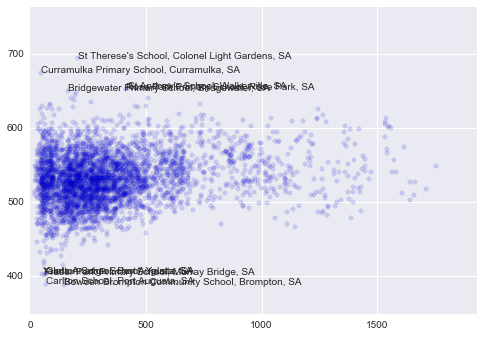

In [7]:
import seaborn
import matplotlib.pyplot as plt
#from IPython import display
seaborn.set_style('darkgrid')
stats = stats[stats['Full-time equivalent enrolments'].notnull()]

def label_point_orig(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['y'] > y.std() * 3:
            ax.text(point['x'], point['y'], str(point['val']))
        elif point['y'] in y.order()[:5].tolist():
            ax.text(point['x'], point['y'], str(point['val']))
        else:
            ax.text(point['x'], point['y'], str(''))
            
plt.scatter(x=stats['Full-time equivalent enrolments'],
           y=stats['Year 7 | Numeracy'],
           alpha=0.15)
plt.xlim(stats['Full-time equivalent enrolments'].min()*0.9,stats['Full-time equivalent enrolments'].max()*1.1)
plt.ylim(stats['Year 7 | Numeracy'].min()*0.9,stats['Year 7 | Numeracy'].max()*1.1)

label_point_orig(stats['Full-time equivalent enrolments'], stats['Year 7 | Numeracy'], stats['Name'], plt)
draw()

In [11]:
stats['Year 7 | Numeracy'].mean()+stats['Year 7 | Numeracy'].std()*3

633.30025119514391